<a href="https://colab.research.google.com/github/VINAY-GOPAL/EDA-and-hypothesis-testing-on-micro-mobility-service-provider-/blob/main/yu_hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data is about the micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, company provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Company has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

# **Column Profiling:**

datetime: datetime

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not 

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
weather:

    1: Clear, Few clouds, partly cloudy, partly cloudy

    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered

Count is a dependent variable & remaining variables are independent.

# **Problem Statement**

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

How well those variables describe the electric cycle demands

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
from statsmodels.graphics.gofplots import qqplot,qqplot_2samples

In [ ]:
df = pd.read_csv("bike_sharing.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000




*   On an average, 36 casual users and 155 registered users have used the bikes




In [ ]:
df.describe(include="object")

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [ ]:
#Checking if any null values are present

df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are no null values.

# **Outlier detection**

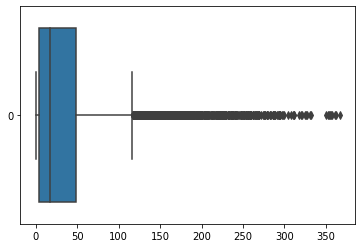

In [ ]:
sns.boxplot(data=df['casual'],orient='h')

In [ ]:
q_1 = df['casual'].quantile(0.25)
q_1

4.0

In [ ]:
q_3 = df['casual'].quantile(0.75)
q_3

49.0

In [ ]:
iqr_casual = q_3-q_1
iqr_casual

45.0

In [ ]:
lower = q_1-1.5*iqr_casual
upper = q_3+1.5*iqr_casual
print(lower,upper)

-63.5 116.5


In [ ]:
cas = df[(df["casual"] < lower) | (df["casual"] > upper)]
len(cas)

749

In [ ]:
len(cas)/len(df)*100

6.880396839977953

There are approximately 7% outliers in casual column.

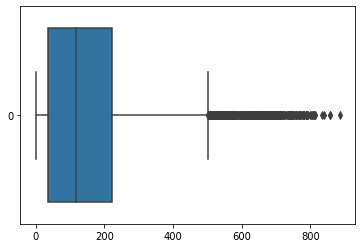

In [ ]:
sns.boxplot(data=df['registered'],orient='h')

In [ ]:
q_1r = df['registered'].quantile(0.25)
q_1r

36.0

In [ ]:
q_3r = df['registered'].quantile(0.75)
q_3r

222.0

In [ ]:
iqr_reg = q_3r-q_1r
iqr_reg

186.0

In [ ]:
lower_reg = q_1-1.5*iqr_reg
upper_reg = q_3+1.5*iqr_reg
print(lower_reg,upper_reg)

-275.0 328.0


In [ ]:
reg = df[(df["registered"] < lower_reg) | (df["registered"] > upper_reg)]
len(reg)

1310

In [ ]:
len(reg)/len(df)*100

12.03380488701084

There are 12% outliers in registered column.

# **Univariate Analysis**

In [ ]:
df["season"].unique()

array([1, 2, 3, 4])

In [ ]:
df["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


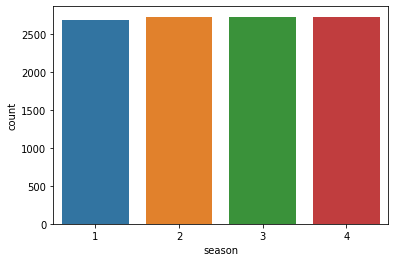

In [ ]:
sns.countplot(df["season"])

In [ ]:
df["holiday"].unique()

array([0, 1])

In [ ]:
df["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


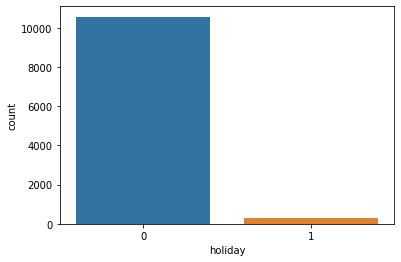

In [ ]:
sns.countplot(df["holiday"])

There are 311 holidays.

In [ ]:
df["workingday"].unique()

array([0, 1])

In [ ]:
df["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


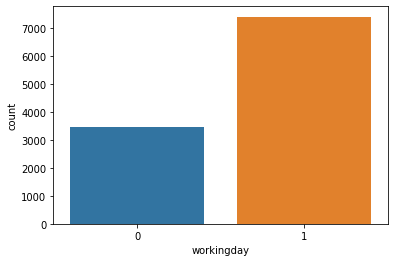

In [ ]:
sns.countplot(df["workingday"])

There are 7412 working days.

In [ ]:
df["weather"].unique()

array([1, 2, 3, 4])

In [ ]:
df["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


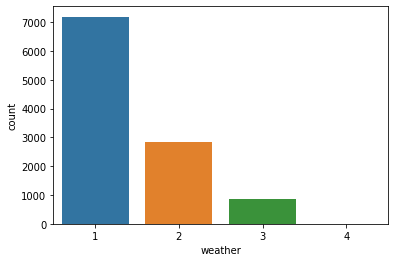

In [ ]:
sns.countplot(df["weather"])

There is only one day with Heavy Rain, Ice Pallets,Thunderstorm & Mist and Snow & Fog

# **Bi-Variate Analysis**


**Let's find relation between season and casual users. we'll try to find number of casual users in each season.**

In [ ]:
df.groupby("season")["casual"].sum()

season
1     41605
2    129672
3    142718
4     78140
Name: casual, dtype: int64

In [ ]:
df["casual"].sum()

392135

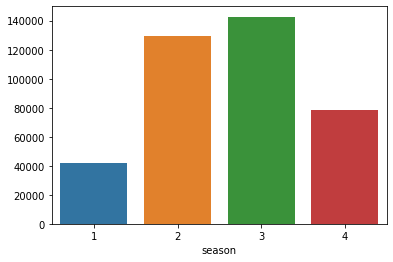

In [ ]:
res = df.groupby("season")["casual"].sum()
sns.barplot(x = res.index, y = res.values)



*   Fall season has more casual users compared to other seasons.
*   Spring season has less casual users compared to other seasons.



**Let's find relation between season and registered users. we'll try to find number of registered users in each season.**

In [ ]:
df.groupby("season")["registered"].sum()

season
1    270893
2    458610
3    497944
4    465894
Name: registered, dtype: int64

In [ ]:
df["registered"].sum()

1693341

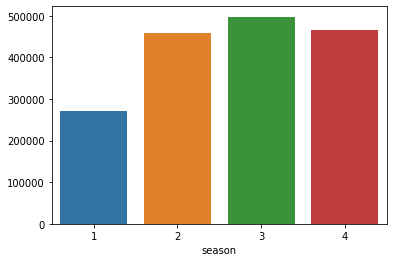

In [ ]:
res = df.groupby("season")["registered"].sum()
sns.barplot(x = res.index, y = res.values)



*   Fall season has more registered users compared to other seasons.
*   Spring season has less registered users compared to other seasons.



Since fall has more casual and registered users than other seasons, even for total users fall will have more users than other seasons.

Similarly, spring has less casual and registered users than other seasons, even for total users spring will have more users than other seasons.

Let's find number of total users in each season.

In [ ]:
df.groupby("season")["count"].sum()

season
1    312498
2    588282
3    640662
4    544034
Name: count, dtype: int64

In [ ]:
df["count"].sum()

2085476

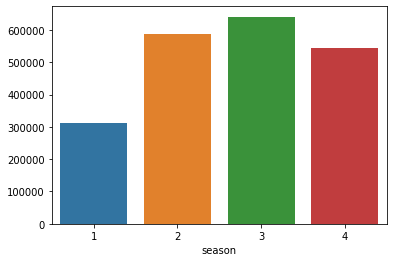

In [ ]:
res = df.groupby("season")["count"].sum()
sns.barplot(x = res.index, y = res.values)



*   Fall season has more total users compared to other seasons.
*   Spring season has less total users compared to other seasons.



**Now let's find whether casual users use bikes more on holiday or not.**

In [ ]:
df.groupby("holiday")["casual"].sum()

holiday
0    376964
1     15171
Name: casual, dtype: int64

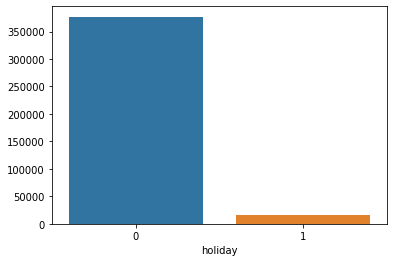

In [ ]:
res = df.groupby("holiday")["casual"].sum()
sns.barplot(x = res.index, y = res.values)

Casual users use less bikes on holiday

**Now let's find whether registered users use bikes more on holiday or not.**

In [ ]:
df.groupby("holiday")["registered"].sum()

holiday
0    1650704
1      42637
Name: registered, dtype: int64

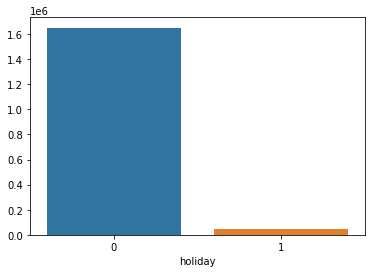

In [ ]:
res = df.groupby("holiday")["registered"].sum()
sns.barplot(x = res.index, y = res.values)

Registered users use less bikes on holiday.

**Now let's find whether total users use bikes more on holiday or not.**

In [ ]:
df.groupby("holiday")["count"].sum()

holiday
0    2027668
1      57808
Name: count, dtype: int64

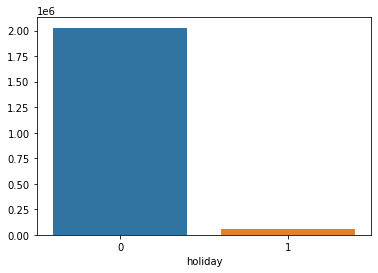

In [ ]:
res = df.groupby("holiday")["count"].sum()
sns.barplot(x = res.index, y = res.values)

So, total users also use bikes less on holiday. 

It is obvious from the above analysis that usage of bikes is less on holidays.

**Now let's find whether casual users use bikes more on workingday or not.**

In [ ]:
df.groupby("workingday")["casual"].sum()

workingday
0    206037
1    186098
Name: casual, dtype: int64

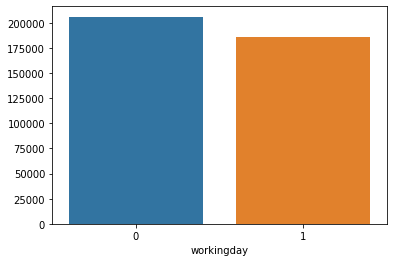

In [ ]:
res = df.groupby("workingday")["casual"].sum()
sns.barplot(x = res.index, y = res.values)

Working day has less number of casual users and more on non working day.

**Now let's find whether registered users use bikes more on workingday or not.**

In [ ]:
df.groupby("workingday")["registered"].sum()

workingday
0     448835
1    1244506
Name: registered, dtype: int64

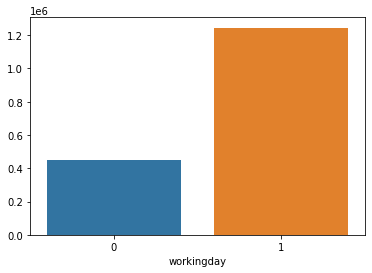

In [ ]:
res = df.groupby("workingday")["registered"].sum()
sns.barplot(x = res.index, y = res.values)

Working day has more number of registered users and less on non working day.

This is maybe because of registered users use bikes more to commute to office.

**Now let's find whether total users use bikes more on workingday or not.**

In [ ]:
df.groupby("workingday")["count"].sum()

workingday
0     654872
1    1430604
Name: count, dtype: int64

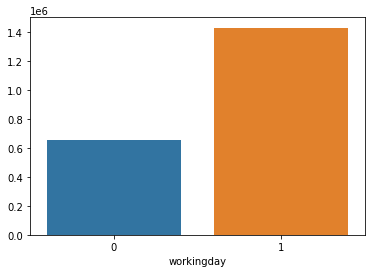

In [ ]:
res = df.groupby("workingday")["count"].sum()
sns.barplot(x = res.index, y = res.values)

Working day has more number of total users and less on non working day.

**Let's find the relation between weather and casual users.**

In [ ]:
df.groupby("weather")["casual"].sum()

weather
1    289900
2     87246
3     14983
4         6
Name: casual, dtype: int64

In [ ]:
df[df["weather"] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164


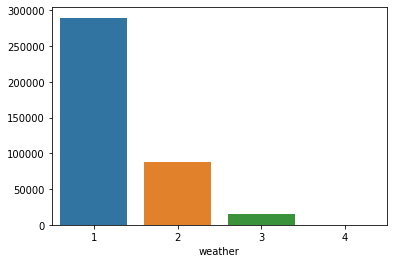

In [ ]:
res = df.groupby("weather")["casual"].sum()
sns.barplot(x = res.index, y = res.values)

Casual users have used the bikes more on clear, Few clouds, partly cloudy & partly cloudy days and least on when there is Light Snow, Light Rain, Thunderstorm, Scattered clouds, Light Rain, Scattered clouds.

Their are only 6 casual users on when there is Heavy Rain, Ice Pallets, Thunderstorm and Mist, Snow and Fog.  



**Let's find the relation between weather and registered users.**

In [ ]:
df.groupby("weather")["registered"].sum()

weather
1    1186163
2     419914
3      87106
4        158
Name: registered, dtype: int64

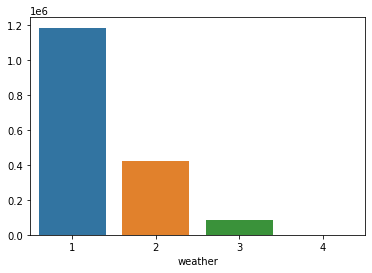

In [ ]:
res = df.groupby("weather")["registered"].sum()
sns.barplot(x = res.index, y = res.values)

Registered users have used the bikes more on clear, Few clouds, partly cloudy & partly cloudy days and least on when there is Light Snow, Light Rain, Thunderstorm, Scattered clouds, Light Rain, Scattered clouds.

Their are only 158 registered users on when there is Heavy Rain, Ice Pallets, Thunderstorm and Mist, Snow and Fog.

Let's see the correlation between the columns.

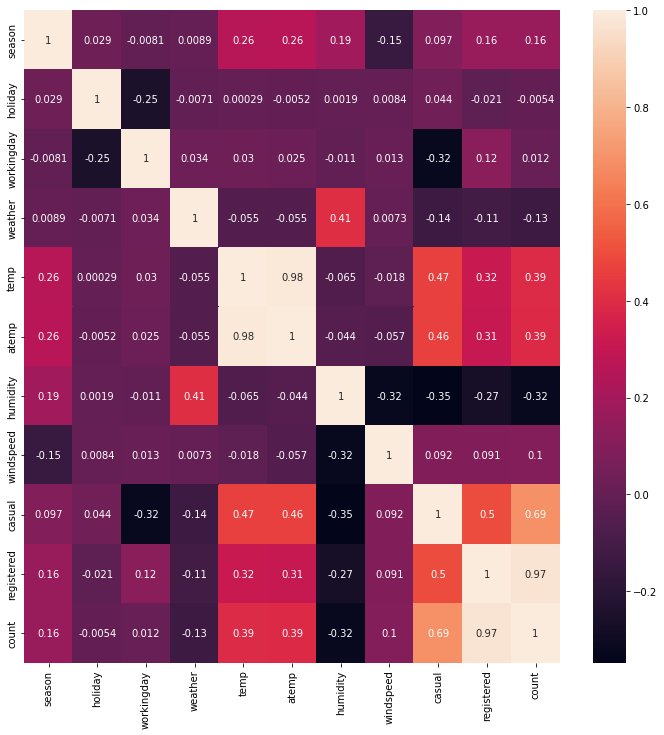

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.show()


**Let's plot a graph between casual users and temperature and see is there any relation between them.**

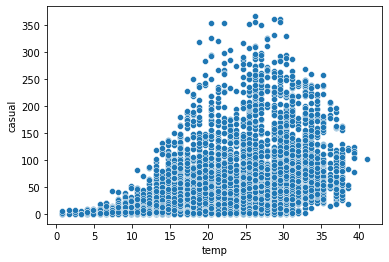

In [ ]:
sns.scatterplot(data=df, x=df['temp'], y=df['casual'])

We can see that as the temperature increases casual users also increased.

**Let's plot a graph between registered users and temperature and see is there any relation between them.**

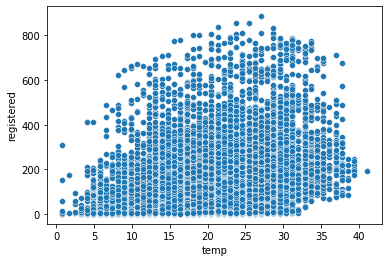

In [ ]:
sns.scatterplot(data=df, x=df['temp'], y=df['registered'])

We can see that as the temperature increases registered users also increased.

**Let's plot a graph between total users and temperature and see is there any relation between them.**

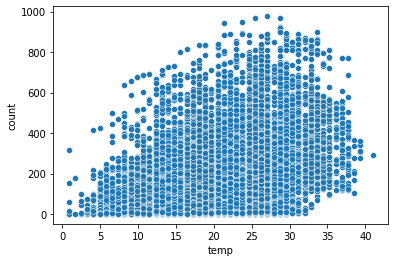

In [ ]:
sns.scatterplot(data=df, x=df['temp'], y=df['count'])

We can see that as the temperature increases total users also increased.

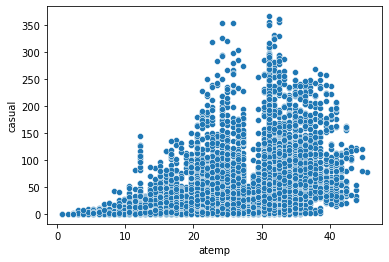

In [ ]:
sns.scatterplot(data=df, x=df['atemp'], y=df['casual'])

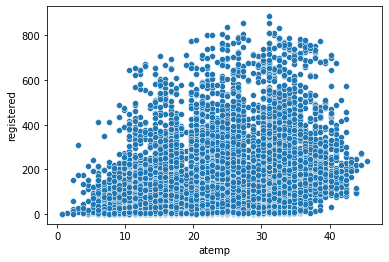

In [ ]:
sns.scatterplot(data=df, x=df['atemp'], y=df['registered'])

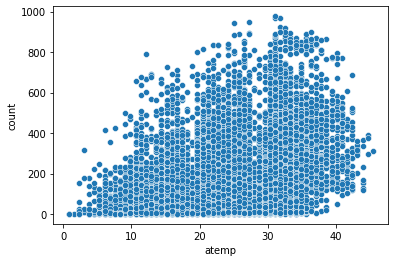

In [ ]:
sns.scatterplot(data=df, x=df['atemp'], y=df['count'])

**Let's plot a graph between casual users and humidity and see is there any relation between them.**

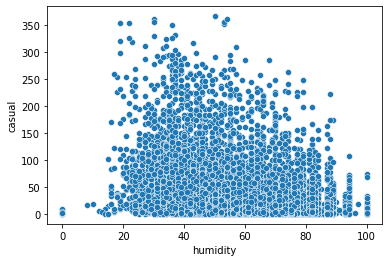

In [ ]:
sns.scatterplot(data=df, x=df['humidity'], y=df['casual'])

There are more casual users when humidity is in between 20 to 80.

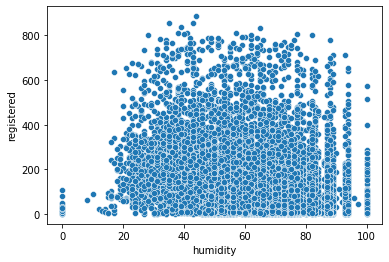

In [ ]:
sns.scatterplot(data=df, x=df['humidity'], y=df['registered'])

There are more registered users when humidity is in between 20 to 90.

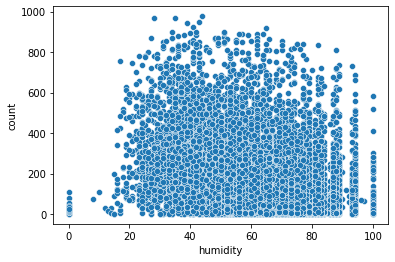

In [ ]:
sns.scatterplot(data=df, x=df['humidity'], y=df['count'])

There are more registered users when humidity is in between 20 to 90.

**Let's plot a graph between casual users and windspeed and see is there any relation between them.**

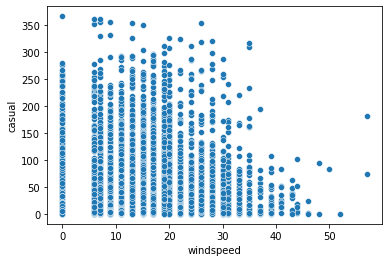

In [ ]:
sns.scatterplot(data=df, x=df['windspeed'], y=df['casual'])

Windspeed and casual are not that much corelated.



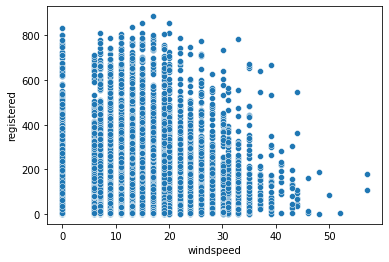

In [ ]:
sns.scatterplot(data=df, x=df['windspeed'], y=df['registered'])

Windspeed and registered are not that much corelated.



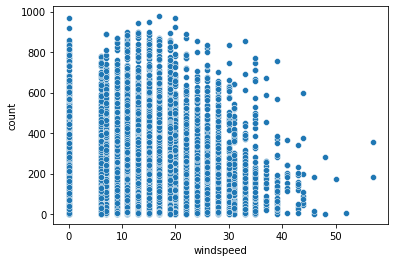

In [ ]:
sns.scatterplot(data=df, x=df['windspeed'], y=df['count'])

Windspeed and count are not that much corelated.



Select an appropriate test to check whether:



*   Working Day has effect on number of electric cycles rented.
*   No. of cycles rented similar or different in different seasons.

*   No. of cycles rented similar or different in different weather.
*   Weather is dependent on season (check between 2 predictor variable).











**Let's check whether working day has effect on number of electric cycles rented**

Let's set up null and alternate hypothesis:

Ho : working day has effect on number of electric cycles rented

Ha : working day has no effect on number of electric cycles rented

In [ ]:
working = df[df['workingday'] == 1]
working[['workingday','count']].head()

,workingday,count
47,1,5
48,1,2
49,1,1
50,1,3
51,1,30


In [ ]:
len(working)

7412

In [ ]:
work_mean = working['count'].mean()
work_mean

193.01187263896384

In [ ]:
non_working = df[df['workingday'] == 0]
non_working[['workingday','count']].head()

,workingday,count
0,0,16
1,0,40
2,0,32
3,0,13
4,0,1


In [ ]:
len(non_working)

3474

In [ ]:
nonwork_mean = non_working['count'].mean()
nonwork_mean

188.50662061024755

As n is large we can do both z-test and t-test. for large n, t-distribution converges to normal distribution. so, both z-test and t-test will give almost same result.

In [ ]:
#2 sample t test

ttest_ind(working['count'], non_working['count'])

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.22644804226361348)

In [ ]:
#2 sample z test

ztest(working['count'], non_working['count'],value = 0)

(1.2096277376026694, 0.22642176970306893)

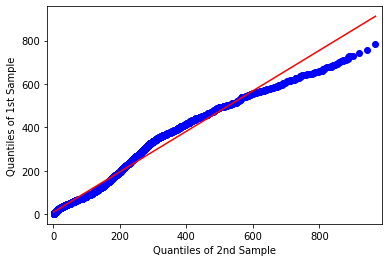

In [ ]:
#QQ plot

qqplot_2samples(working['count'], non_working['count'],line='r')
plt.show()

As we can see p-value for both z-test and t-test are same.

Let's set significance level(alpha) = 0.05.

As p-value is greater than alpha, so we accept null hypothesis.

That means working day has effect on number of electric cycles rented.

**Let's check No. of cycles rented similar or different in different seasons.**

Let's set up null and alternate hypothesis:

Ho : All seasons have similar no. fo cycles rented.

Ha : All seasons have different no. fo cycles rented.

In [ ]:
spring = df[df['season'] == 1]
spring[['season','count']].head()

,season,count
0,1,16
1,1,40
2,1,32
3,1,13
4,1,1


In [ ]:
summer = df[df['season'] == 2]
summer[['season','count']].head()

,season,count
1323,2,6
1324,2,4
1325,2,7
1326,2,4
1327,2,3


In [ ]:
fall = df[df['season'] == 3]
fall[['season','count']].head()

,season,count
2690,3,68
2691,3,31
2692,3,13
2693,3,11
2694,3,6


In [ ]:
winter = df[df['season'] == 4]
winter[['season','count']].head()

,season,count
4055,4,130
4056,4,58
4057,4,67
4058,4,25
4059,4,8


In [ ]:
# ANOVA 

f_stat, p_val = f_oneway(spring['count'], summer['count'], fall['count'], winter['count'])

In [ ]:
f_stat

236.94671081032106

In [ ]:
p_val

6.164843386499654e-149

Let's set significance level(alpha) = 0.05.

As p-value is very less than alpha, we can rejet the null hypothesis.

we can say all seasons have different no. fo cycles rented.

**Let's check no. of cycles rented similar or different in different weather.**

Let's set up null and alternate hypothesis:

Ho : All types of weather have similar no. fo cycles rented.

Ha : All types of weather have different no. fo cycles rented.

In [ ]:
clear = df[df['weather'] == 1]
clear[['weather','count']].head()

,weather,count
0,1,16
1,1,40
2,1,32
3,1,13
4,1,1


In [ ]:
mist = df[df['weather'] == 2]
mist[['weather','count']].head()

,weather,count
5,2,1
13,2,94
14,2,106
15,2,110
16,2,93


In [ ]:
Light_Snow = df[df['weather'] == 3]
Light_Snow[['weather','count']].head()

,weather,count
18,3,35
19,3,37
29,3,2
31,3,8
37,3,59


In [ ]:
Heavy_Rain = df[df['weather'] == 4]
Heavy_Rain[['weather','count']].head()

,weather,count
5631,4,164


In [ ]:
# ANOVA 

f_stat, p_val = f_oneway(clear['count'], mist['count'], Light_Snow['count'], Heavy_Rain['count'])

In [ ]:
p_val

5.482069475935669e-42

Let's set significance level(alpha) = 0.05.

As p-value is very less than alpha, we can rejet the null hypothesis.

we can say all types of weather have different no. fo cycles rented.

**Let's check weather is dependent on season.**

Let's set up null and alternate hypothesis:

Ho : weather is not dependent on season.

Ha : weather is dependent on season.



In [ ]:
pd.crosstab(index=df["weather"],columns=df["season"],margins=True)

season,1,2,3,4,All
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
All,2686,2733,2733,2734,10886


In [ ]:
o = pd.crosstab(index=df["weather"],columns=df["season"])
o

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [ ]:
#chi2 test

chi_stat, p_val, df, exp_freq = chi2_contingency(o)

In [ ]:
chi_stat

49.15865559689363

In [ ]:
p_val

1.5499250736864862e-07

In [ ]:
df

9

In [ ]:
exp_freq

array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
       [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
       [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
       [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]])

Let's set significance level(alpha) = 0.05.

As p-value is very less than alpha, we can rejet the null hypothesis.

we can say weather is dependent on season.

# **Insights**



*   On an average, 36 casual users and 155 registered users have used the bikes
*   Fall season has more casual & registered users compared to other seasons.


*   Spring season has less casual & registered users compared to other seasons.
* Casual users use less bikes on holiday.


*   Registered users use less bikes on holiday.
*   Working day has less number of casual users and more on non working day.


*   Working day has more number of registered users and less on non working day.
This is maybe because of registered users use bikes more to commute to office.
*   Casual users have used the bikes more on clear, Few clouds, partly cloudy & partly cloudy days and least on when there is Light Snow, Light Rain, Thunderstorm, Scattered clouds, Light Rain, Scattered clouds.




*   Their are only 6 casual users on when there is Heavy Rain, Ice Pallets, Thunderstorm and Mist, Snow and Fog.
*   Registered users have used the bikes more on clear, Few clouds, partly cloudy & partly cloudy days and least on when there is Light Snow, Light Rain, Thunderstorm, Scattered clouds, Light Rain, Scattered clouds.



*   Their are only 158 registered users on when there is Heavy Rain, Ice Pallets, Thunderstorm and Mist, Snow and Fog.
*   As the temperature increases casual & registered users also increased.

* There are more casual users when humidity is in between 20 to 80.


*  There are more registered users when humidity is in between 20 to 90. 
*   As the wind speed increases number of casual & registered users are decreased.


*    working day has effect on number of electric cycles rented. We have proved this using 2 sample z-test and t-test.
*   All seasons have different no. fo cycles rented. We have proved this using ANOVA.


*   All types of weather have different no. fo cycles rented. We have proved this using ANOVA
*   weather is dependent on season. We have proved this using chi2 test.




















# **Recomendations**



*   As fall season has more casual and registered users compared to other seasons, we can slightly increase price in fall season.

*   As spring season has less casual and registered users compared to other seasons, we can offer discount or give some offers to casual and registered users.



*   Casual and registered users use less bikes on holiday, so we can offer discount or give some offers on holidays.

*   Working day has less number of casual users and more on non working day, so we can give some offers to casual users to get registered if they register on working day.



*   Working day has more number of registered users and less on non working day, so most of the registered users are using bikes on working day. Based on this observation, maybe we can slightly increase price on working days or decrease price and attract more casual users to get registered on working day.



















